# YOLO V11 Retraining - Team 103

This notebook can be used as either a template for creating future object detection training programs, or can be used on different datasets to make future models. 

Our goal here is to take the pretrained YOLO V11, or other models, which have robust object detection capabilities, and introduce our new data to the model. This introduction of new data is the same process as originally training the neural network. We will pass in labeled data, and the AI will predict what those labels should be, based on the input image. The Network will then take the "Loss" or error between predicted label, and actual label, and use that to update the network weights. This is called back-propagation.



AI like this is a network, made to mimic what people thought the human brain was 60 years ago. Now we do know that they were incredibly wrong on the neuroscience side, however on the electrical engineering side, this paradigm introduced a new type of computing with the introduction of the perceptron. 
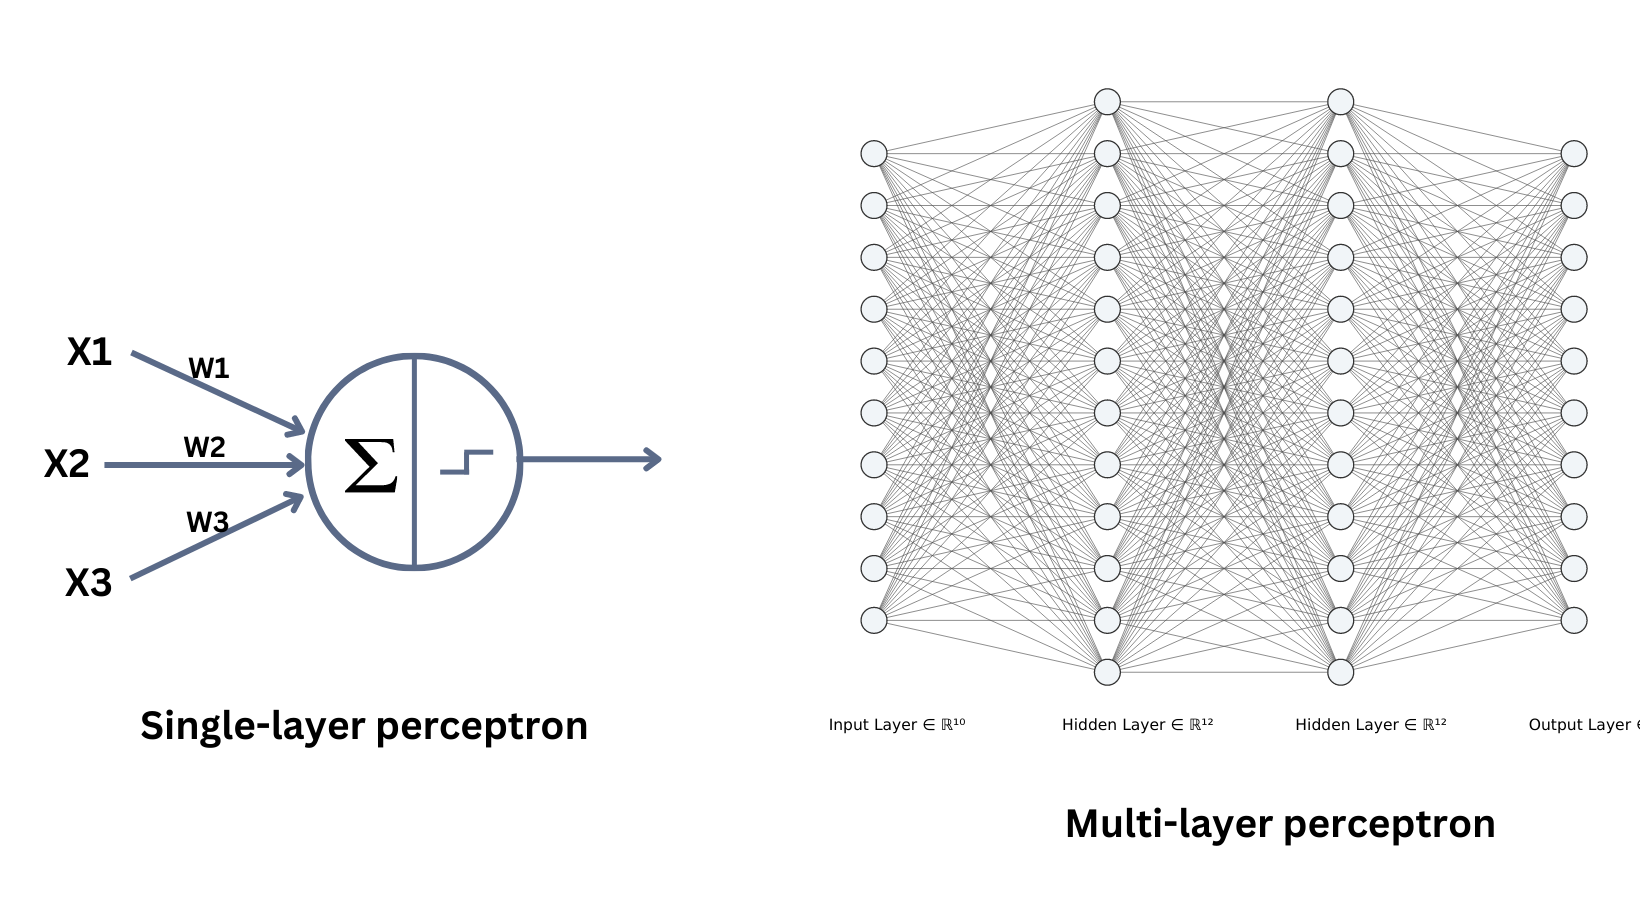
The Perceptron was the first Neural Network created, and was utilized to identify hand written numbers by reporting 10 outputs. Each output was tied to a digit, such as "5," and could be a number 0 to 1, which represented the probability that "5" or any other digit, was the number on the inputed image. 
The idea behind the perceptron was to take in each individual input, represented at the input layer, and pass each one on to a hidden layer. Each hidden layer was made of some number of "neurons." Each neuron would sum all the values from the layer before, with each value multiplied by some "weight."

Each neuron has a table of weights, the length of which is identical to the layer before, so that an output per neuron can be generated as: 

Neuron_Output = X1*W1 + X2*W2 ... + Xn*Wn

Now this output could be any number, however for us, it is more stable and understandable if we limit these outputs on any neuron to 0 through 1. We use a "sigmoid" function to do this, which is a function defined so that any real number is mapped to 0 through 1.

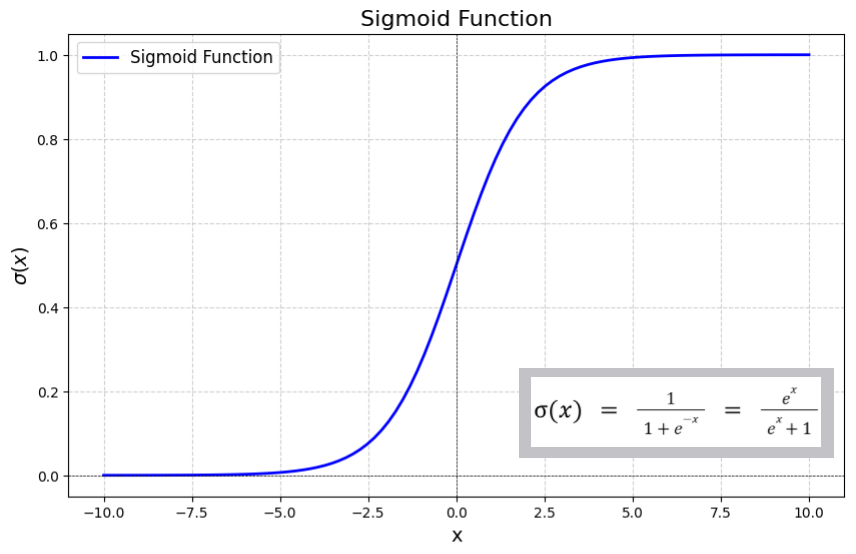




## What does any of this do for us
### (Currently nothing)

So we have inputs, and we know that each neuron has some list of weights, and we know that there are layers of neurons all doing this on the layer before. So what. 

The main theory that holds this system together, is that we can aproximate ANY function at the output, if we have enough neurons, and can find the correct weights for those neurons. "Enough" generally means infinite here, and finding the "correct" weights for any of those neurons would also take "infinite" time... But as with everything, good enough works! Largely the definition of "enough" will change widely depending on application. "Enough" in terms of classifying whether an image shows a handwritten "6" is rougly 60 neurons, with up to 60^2 parameters (3600). "Enough" for drawing a box around a game piece is more like 3 million parameters..

As we add parameters, or weights, we require more data in and more training time to aproximate our outputs. But how does this work? Right now we just have random "weights" and no way to find them.

## Back Propagation

Backpropagation is a method used in training neural networks where the model:

1: Makes a prediction
2: Compares it to the correct answer
3: Calculates the error
4: Sends that error backward through the network
5: Adjusts the internal settings (weights) to reduce future errors

We do this process over and over during the training phase, on our input training data. We may have started with randomly initialized "weights,"  but after many training rounds, these wieghts will update and aproach the "correct" values. Correct is in quotes here, and that is on purpose. Correct to the neural network could mean a lot of things, and none of those are what you or I would define as "correct."

If we pass in bad data that has some sort of tell, or improperly labeled data, or data that has a lot of one type of object, but not another, the network may "learn" the wrong things. If you were training a network to detect a ball, you might take many images of the ball, all in the environment you expect it to come from, say on the carpet. This makes intuitive sense to us, becuase it seems more realistic to what the camera will be seeing. The problem arises from something we call Correlation between variables. If all our pictures of balls are on carpet, then the network has no other context but to think these are correlated variables. You may end up with a detector that sees a ball and says "ball," but also sees the carpet and falsely assumes "ball."

There are also cases of this in the reverse, where the model might not detect a ball becuase it is against a wooden wall, or in the air.

All this to say that AI in every form is completely restricted by quality data with quality labels.


# TLDR Lets train our model on a given dataset

We will be assuming a few things. For one this document will be originally setup to interface with YOLOV11. This model is pretrained, and we will be adjusting the weights on it with the same concept of back propagation shown above. The advantage of using a base like YOLOv11 is that it is already quite good at detection, but of course doesn't know the game pieces we are attempting to find. So we can introduce this model to our data, rather than starting fresh, and greatly accelerate our training time, as well as decrease the amount of data we need to pass in to train all 3 million parameters. Rather than training all 3M, we just need to adjust them enough to recognize our objects as well.

In [1]:
# # simulated training example loss
# import matplotlib.pyplot as plt
# import time
# import random

# # Enable interactive mode
# plt.ion()

# # Initialize lists to store epoch and loss values
# epochs = []
# losses = []

# # Create a figure and axis
# fig, ax = plt.subplots()
# line, = ax.plot(epochs, losses, 'b-', label='Training Loss')
# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# ax.set_title('Live Training Loss Visualization')
# ax.legend()

# # Simulate training loop with live updates
# for epoch in range(1, 21):
#     # Simulate a loss value (in real training, you'd get this from the model)
#     loss = random.uniform(0.5, 1.5) / epoch
    
#     # Append new data
#     epochs.append(epoch)
#     losses.append(loss)
    
#     # Update the plot
#     line.set_xdata(epochs)
#     line.set_ydata(losses)
#     ax.relim()
#     ax.autoscale_view()
#     fig.canvas.draw()
#     fig.canvas.flush_events()
    
#     # Simulate time delay for training
#     time.sleep(0.5)

# # Keep the plot open after training
# plt.ioff()
# plt.show()


## Step 1: Requirements before you run this file.

Python version 3.10 or higher.
NVIDIA CUDA V13.0 -> if you have a different version of cuda, you will need to make sure you find matching packages pythons torch and torchvision librarys. You can install the requirements.txt, then uninstall those specific packages, and search online for the correct versions. it should look like:

pip install torch torchvision --index-url https://download.pytorch.org/whl/cu130

where the 130 at the end is for V13.0

You likely already have done this, but in this directory we need to create a virual environment and gather the required librarys for this script.

Note: python -m before commands just tells the cmd to use python to find some of these commands. often you can call some of these without the "python -m" but this should work every time.
run the following commands !! IN CMD NOT POWERSHELL !!:



In [2]:
#pip install venv ## install the virtual environment library

#python -m venv env ## do this in specifically cmd, not powershell, and in the folder with this file.

#.\env\Scripts\activate.bat ## takes this terminal into the special virtual environment, 
                            # allowing librarys to live here for this project specifically,
                            # rather than on the whole computer. this helps with keeping versions alligned.

# python -m pip install -r requirements.txt ## installs all the requirements for this notebook using the 
                                             # predefined list. 


## Step 2: Opening this document in a live terminal. 

With cmd in the virtual environment and in the folder with this file, run the command :

python -m notebook

and open up the file when propted with a browser view of the directory. You should now be able to run python commands right in this document.


In [3]:
# Test your python and your cuda versions

import torch
import torchvision

# PyTorch version
print("PyTorch version:", torch.__version__)

# TorchVision version
print("TorchVision version:", torchvision.__version__)

# CUDA availability and version
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

# GPU name (if CUDA is available)
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


PyTorch version: 2.9.0+cu130
TorchVision version: 0.24.0+cu130
CUDA available: True
CUDA version: 13.0
GPU: NVIDIA RTX A5000 Laptop GPU


The above block should return something like this:

In [4]:
# PyTorch version: 2.9.0+cu130
# TorchVision version: 0.24.0+cu130
# CUDA available: True
# CUDA version: 13.0
# GPU: NVIDIA RTX A5000 Laptop GPU

Signalling that cuda is available, and that all our versions are 13.0, or if another version, they need to all 
match.

## Importing YOLO

In [5]:
from ultralytics import YOLO # ultralytics is the creator of the YOLO model, 
                             # and provides this library for interfacing with the model
import ultralytics
print(ultralytics.__version__)

8.3.221


## Setting up Our Data Paths

In [6]:
import os,time

YoloModelPath = r"models\yolo11n.pt"
# pt (pretrained) file from yolo website, can be changed if training for a different yolo model
# this file has the original weights for yolo11n
DataYamlPath = r"dataset\data.yaml"
# this is the path to our data definition file. This file has information on the 
# types of things we're identifying, how many things we are identifying, and
# where to find the data for test, validation, and training.
outputPath = r"Trained Models and Results"
modelName = r"Coral and Algae"
modelName = modelName +" "+ time.strftime("%Y%m%d_%H%M%S")
logdir = "\"\\" +os.path.join(outputPath,modelName) +"\""
print(logdir)

"\Trained Models and Results\Coral and Algae 20251028_140329"


In [7]:
model = YOLO(YoloModelPath) # define our model

In [8]:

# from IPython.display import display
# from IPython import get_ipython
# %load_ext tensorboard
# get_ipython().run_line_magic('tensorboard', f'--logdir {logdir}')



In [9]:
# Train the model
model.train(data=DataYamlPath, epochs=10, imgsz=640, batch=32,device = 0, project = outputPath,name = modelName, patience =3,plots=True)

Ultralytics 8.3.221  Python-3.12.10 torch-2.9.0+cu130 CUDA:0 (NVIDIA RTX A5000 Laptop GPU, 16384MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=models\yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Coral and Algae 20251028_140329, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, 

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/christopher-reckner/trained-models-and-results/bc1866cb90024dedaf2fd108364757f3



Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              


COMET INFO: Couldn't find a Git repository in 'C:\\Users\\chris.reckner\\Documents\\pythontests\\Training ML Model' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : encouraging_lizard_5026
COMET INFO:     url                   : https://www.comet.com/christopher-reckner/trained-models-and-results/bc1866cb90024dedaf2fd108364757f3
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [180]                : (24589.91015625, 13809158.0)
COMET INFO:     lr/pg0 [11]               : (0.00018170299999999996, 0.0013344581962962964)
COMET INFO:     lr/pg1 [11]               : (0.00018170299999999996, 0.0013344581962962964)
COMET INFO:     lr/pg2 [11]               : (0.00018170299999999996, 0.0013344581962962964)
COMET INFO:     metrics/mAP50(B) [11]     : (0.7415, 0.9948047355958958)
COMET INFO:     metrics/mAP5

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000196B5CE00B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0